Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\AppData\Local\Temp\ipykernel_3408\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Read the data and perform datacleaning if necessary

In [4]:
df=pd.read_csv('Heart_health.csv')
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    724 non-null    int64 
 1   Name                  724 non-null    object
 2   Age                   724 non-null    int64 
 3   Gender                724 non-null    object
 4   Height(cm)            724 non-null    int64 
 5   Weight(kg)            724 non-null    int64 
 6   Blood Pressure(mmHg)  724 non-null    object
 7   Cholesterol(mg/dL)    724 non-null    int64 
 8   Glucose(mg/dL)        724 non-null    int64 
 9   Smoker                724 non-null    object
 10  Exercise(hours/week)  724 non-null    int64 
 11  Heart Attack          724 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 68.0+ KB


Index(['ID', 'Name', 'Age', 'Gender', 'Height(cm)', 'Weight(kg)',
       'Blood Pressure(mmHg)', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)',
       'Smoker', 'Exercise(hours/week)', 'Heart Attack'],
      dtype='object')

Visualize all the data

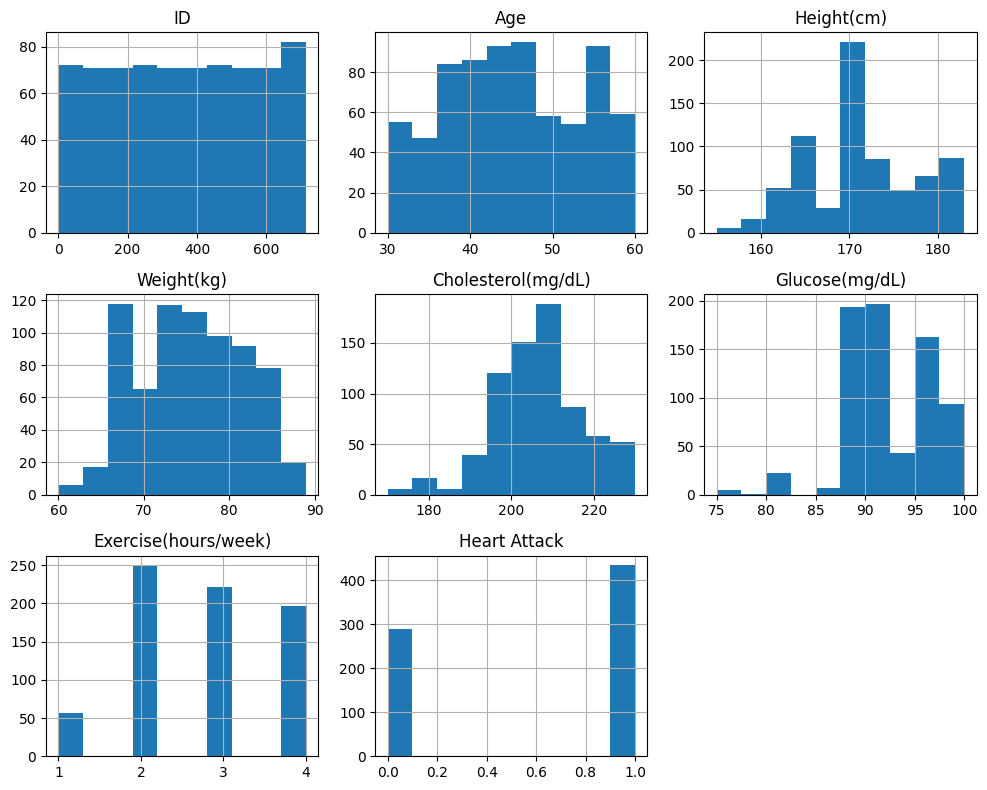

In [5]:
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

Aditional data cleaning is needed

In [6]:
df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure(mmHg)'].str.split('/', expand=True)
df['Systolic Pressure'] = df['Systolic Pressure'].astype(int)
df['Diastolic Pressure'] = df['Diastolic Pressure'].astype(int)
df.drop(columns=['Blood Pressure(mmHg)'], inplace=True)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Smoker'] = df['Smoker'].map({'Yes': 1, 'No': 0})
df['Heart Attack'] = df['Heart Attack'].astype(int)

Search for correlation between various data points

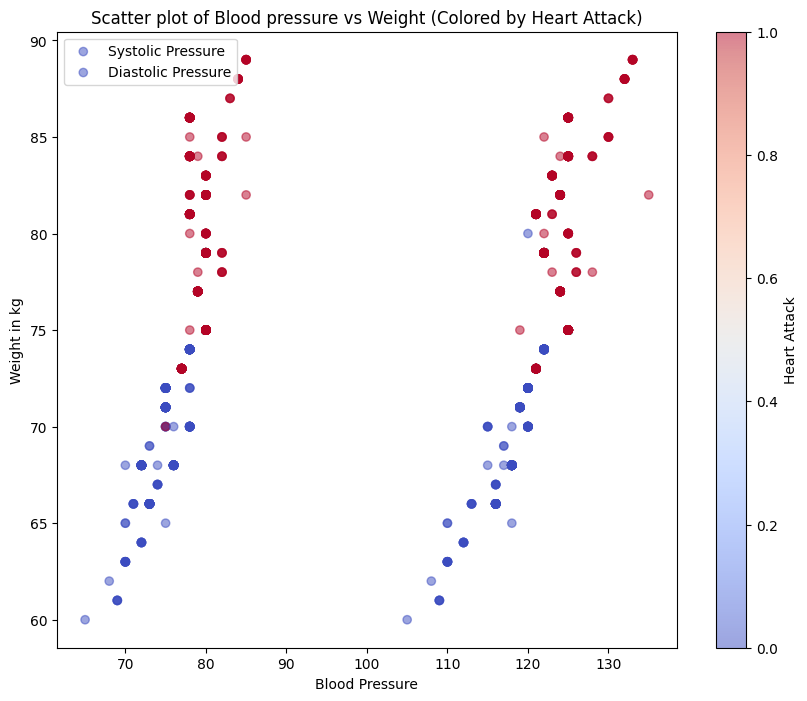

0.837322291491066
0.7918060497930982


In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Systolic Pressure'], df['Weight(kg)'], c=df['Heart Attack'], cmap='coolwarm', label='Systolic Pressure', alpha=0.5)
plt.scatter(df['Diastolic Pressure'], df['Weight(kg)'], c=df['Heart Attack'], cmap='coolwarm', label='Diastolic Pressure', alpha=0.5)
plt.xlabel('Blood Pressure')
plt.ylabel('Weight in kg')
plt.title('Scatter plot of Blood pressure vs Weight (Colored by Heart Attack)')
plt.colorbar(label='Heart Attack')
plt.legend()
plt.show()
correlation=df['Systolic Pressure'].corr(df['Weight(kg)'])
correlation1=df['Diastolic Pressure'].corr(df['Weight(kg)'])
print(correlation)
print(correlation1)

Search for correlation between every numeric data point

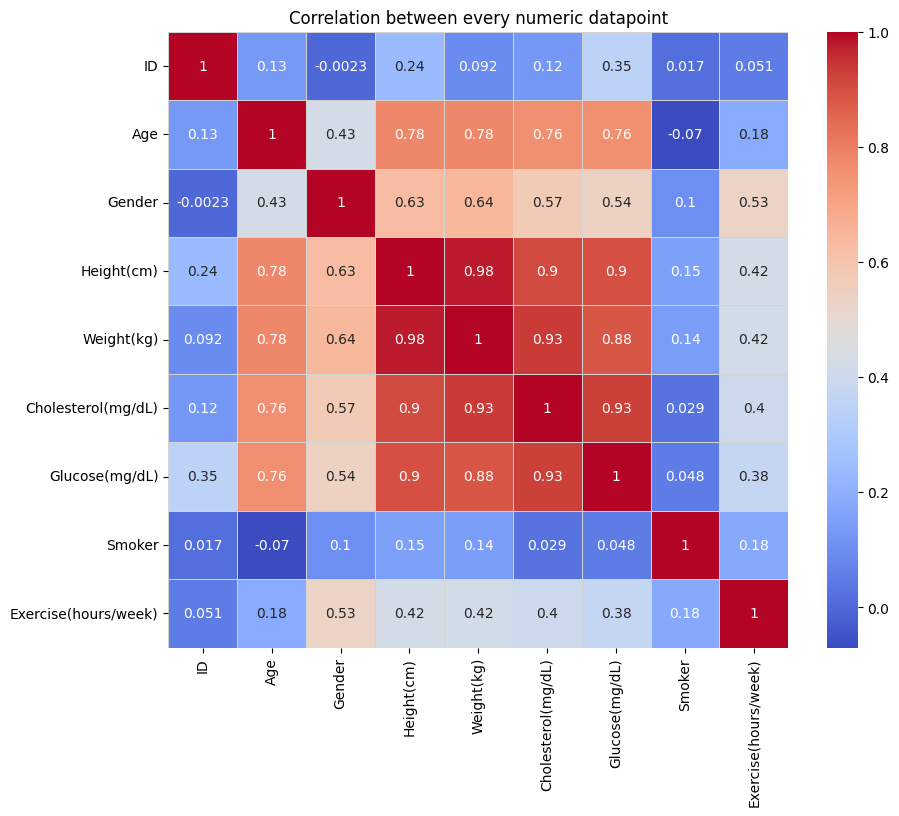

In [8]:
numeric=df.select_dtypes(include=['int64','float64']).columns
corrmatrix=df[numeric].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmatrix,annot=True,cmap='coolwarm',linewidths=0.5,linecolor='lightgrey')
plt.title('Correlation between every numeric datapoint')
plt.show()

Every data points correlation to heart attack

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, '155'),
  Text(1, 0, '156'),
  Text(2, 0, '157'),
  Text(3, 0, '158'),
  Text(4, 0, '159'),
  Text(5, 0, '160'),
  Text(6, 0, '161'),
  Text(7, 0, '162'),
  Text(8, 0, '163'),
  Text(9, 0, '164'),
  Text(10, 0, '165'),
  Text(11, 0, '166'),
  Text(12, 0, '167'),
  Text(13, 0, '168'),
  Text(14, 0, '169'),
  Text(15, 0, '170'),
  Text(16, 0, '171'),
  Text(17, 0, '172'),
  Text(18, 0, '173'),
  Text(19, 0, '174'),
  Text(20, 0, '175'),
  Text(21, 0, '176'),
  Text(22, 0, '177'),
  Text(23, 0, '178'),
  Text(24, 0, '179'),
  Text(25, 0, '180'),
  Text(26, 0, '181'),
  Text(27, 0, '182'),
  Text(28, 0, '183')])

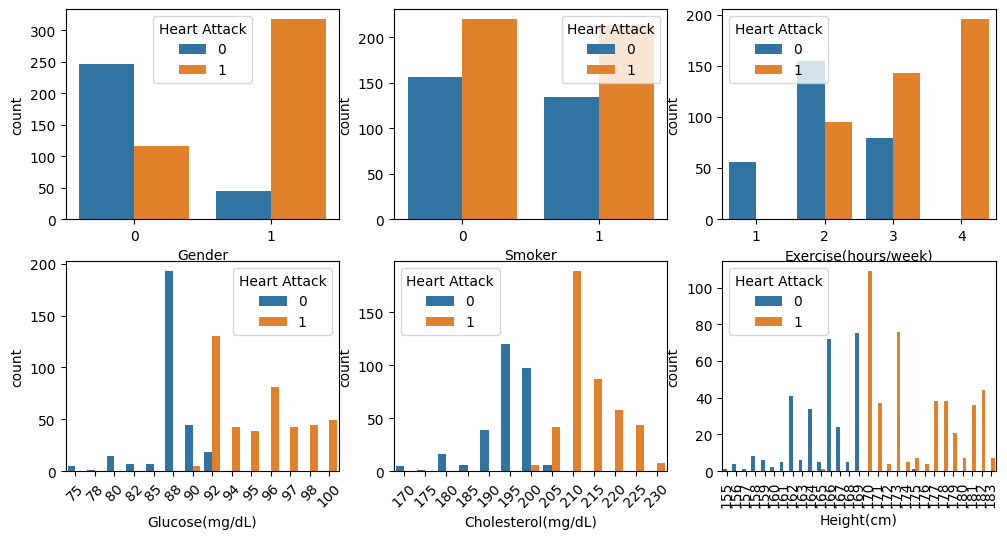

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.countplot(x='Gender', hue='Heart Attack', data=df)
plt.subplot(2, 3, 2)
sns.countplot(x='Smoker', hue='Heart Attack', data=df)
plt.subplot(2, 3, 3)
sns.countplot(x='Exercise(hours/week)', hue='Heart Attack', data=df)
plt.subplot(2, 3, 4)
sns.countplot(x='Glucose(mg/dL)', hue='Heart Attack', data=df)
plt.xticks(rotation=45)
plt.subplot(2, 3, 5)
sns.countplot(x='Cholesterol(mg/dL)', hue='Heart Attack', data=df)
plt.xticks(rotation=45)
plt.subplot(2, 3, 6)
sns.countplot(x='Height(cm)', hue='Heart Attack', data=df)
plt.xticks(rotation=90)

Pie chart visualizing heart attack between genders

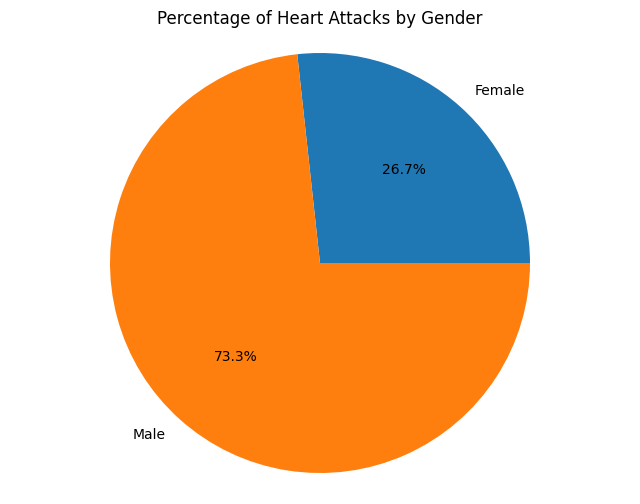

In [10]:
heart_attack_counts = df.groupby('Gender')['Heart Attack'].sum()
total_heart_attacks = heart_attack_counts.sum()
percentage_heart_attacks = (heart_attack_counts / total_heart_attacks) * 100

plt.figure(figsize=(8, 6))
plt.pie(percentage_heart_attacks, labels=percentage_heart_attacks.index.map({0: 'Female', 1: 'Male'}), autopct='%1.1f%%')
plt.title('Percentage of Heart Attacks by Gender')
plt.axis('equal')  
plt.show()

Implement a decisiontree capable of predicting heart attack with a decent accuracy

In [11]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.tree import plot_tree

In [21]:
X = df.drop(['ID', 'Name', 'Heart Attack'], axis=1)
Y=df['Heart Attack']
X

,Age,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Systolic Pressure,Diastolic Pressure
0,45,1,175,80,200,90,0,3,120,80
1,35,0,160,65,180,80,0,2,110,70
2,55,1,180,85,220,95,1,4,130,85
3,40,0,165,70,190,85,0,3,115,75
4,50,1,170,75,210,92,1,2,125,80
...,...,...,...,...,...,...,...,...,...,...
719,39,0,166,68,195,88,0,3,118,76
720,56,1,179,83,220,100,0,2,123,80
721,43,0,167,70,200,92,0,2,120,78
722,53,1,182,86,225,98,1,2,125,78


Split the training data 80-20%

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=32)

Create the decisiontreeclassifier

In [36]:
clf=DecisionTreeClassifier()

In [37]:
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

Check the accuracy of the tree

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.993103448275862


Accuracy: 0.993103448275862


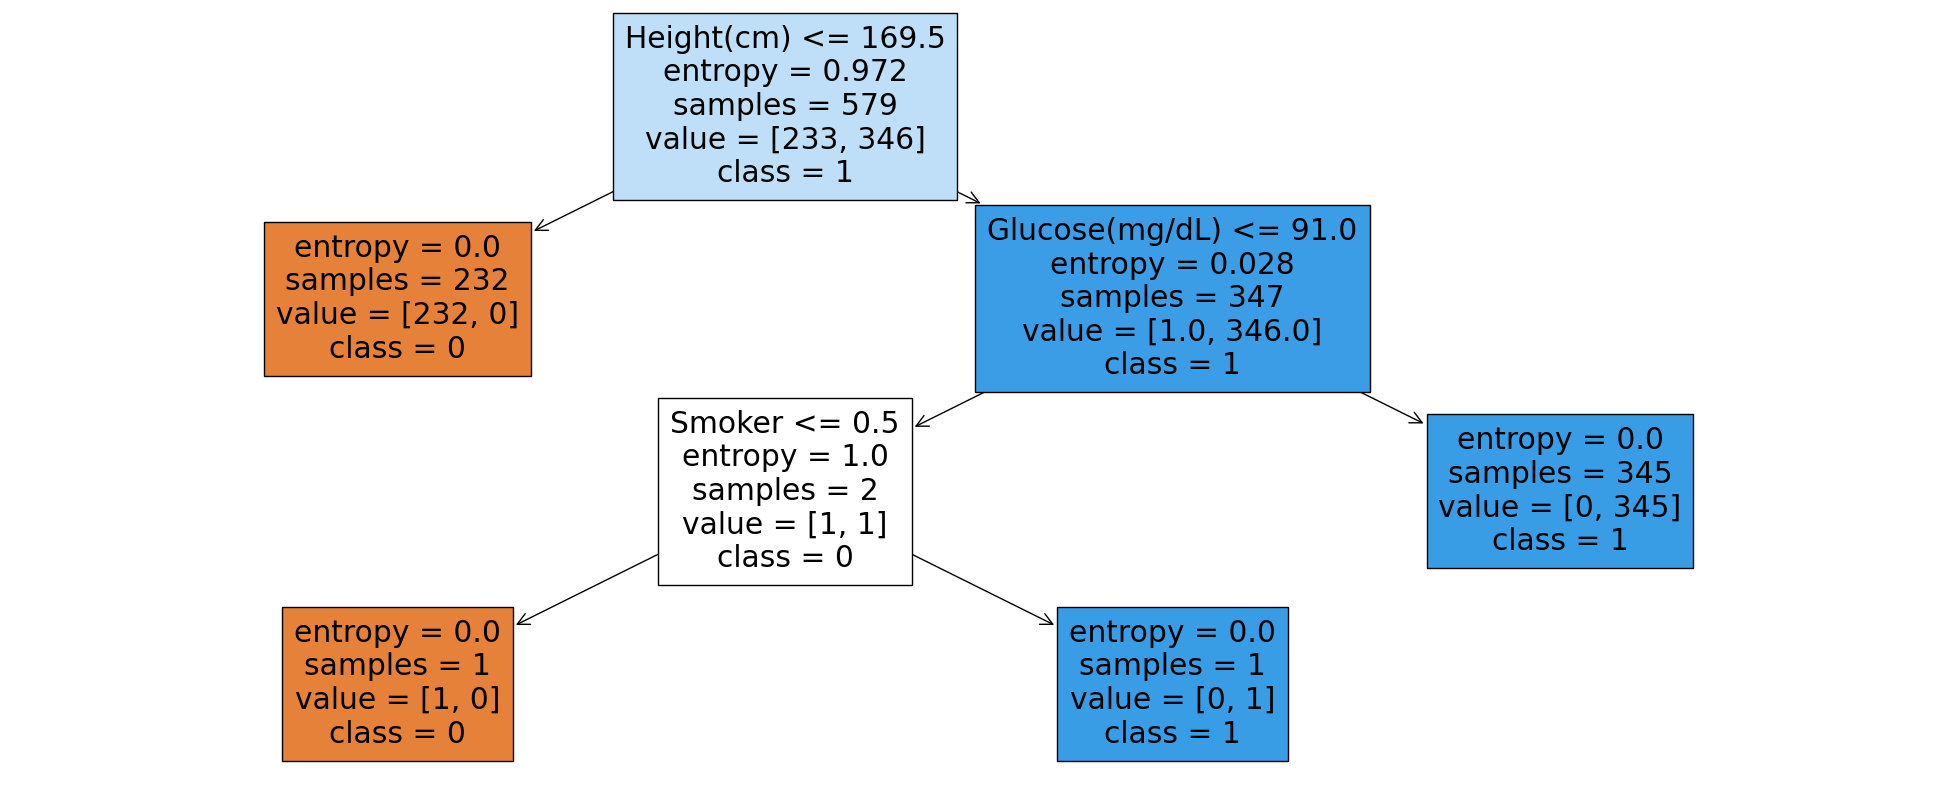

In [40]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)


clf = clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plt.figure(figsize=(25,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=Y.unique().astype(str))
plt.show()